In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
# Read data

train_data = pd.read_excel('C:\\Users\\howger\\Desktop\\kaggle_1\\train.xlsx')


test_data = pd.read_excel('C:\\Users\\howger\\Desktop\\kaggle_1\\test.xlsx')
A = test_data.iloc[:, 1:15]


In [7]:
# 更改特徵欄位名稱

y = train_data["Underclocking"]
train_data.drop(["Underclocking"], axis="columns", inplace=True)

# 取得原始的 column name
original_columns = train_data.columns.tolist()

# 建立新的 column name
new_columns = ['{:03d}'.format(i) for i in range(101, 115)]

# 重新排列 column name
train_data.columns = new_columns
A.columns = new_columns

# 印出結果
print(train_data.columns)


Index(['101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
       '111', '112', '113', '114'],
      dtype='object')


 1) 113                            0.160753
 2) 106                            0.120281
 3) 103                            0.098375
 4) 108                            0.088649
 5) 102                            0.078659
 6) 101                            0.076447
 7) 110                            0.073728
 8) 104                            0.072351
 9) 111                            0.067713
10) 105                            0.066108
11) 109                            0.065333
12) 112                            0.013493
13) 107                            0.009617
14) 114                            0.008494


Text(0.5, 23.52222222222222, 'Feature')

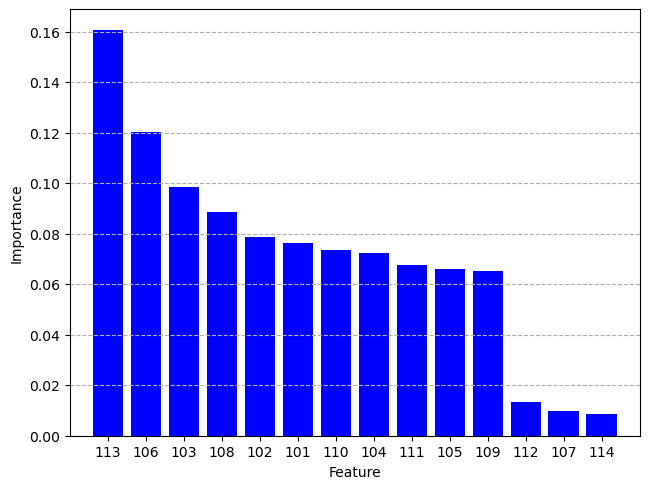

In [9]:
#　使用隨機森林_評估特徵
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

X = train_data
# 選擇特徵範圍，[:14]，代表開頭到第14行是特徵
feat_labels = X.columns[:14]
tree = RandomForestClassifier(n_estimators=500, random_state=1)
tree.fit(X, y)
importances = tree.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center',
        color = 'blue')

plt.xticks(range(X.shape[1]), 
            feat_labels[indices] )
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.ylabel('Importance')
plt.grid(axis='y',linestyle='--')
plt.xlabel('Feature')


In [10]:
X = train_data
X.drop(["112"], axis="columns", inplace=True)
X.drop(["114"], axis="columns", inplace=True)
X.drop(["107"], axis="columns", inplace=True)


A.drop(["112"], axis="columns", inplace=True)
A.drop(["114"], axis="columns", inplace=True)
A.drop(["107"], axis="columns", inplace=True)

In [11]:
# MinMax scaler
# train, val, test split
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
X = scalerx.fit_transform(X) # 將訓練數據 轉換成0-1的矩陣
A = scalerx.fit_transform(A) 
# split 會變成陣列
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=None)

In [12]:
print("X_train data number:",X_train.shape)
print("X_val data number:",X_val.shape)
print("X_test data number:", X_test.shape)

X_train data number: (3160, 11)
X_val data number: (352, 11)
X_test data number: (391, 11)


In [17]:
# ====== Random Forest Classifier ========
tree = RandomForestClassifier(n_estimators = 250, max_depth = 64)
tree.fit(X_train,y_train)
# Create our predictions
y_prediction = tree.predict(X_test)
y_prediction_train = tree.predict(X_train)
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_prediction)
# Display accuracy score
print(accuracy_score(y_test, prediction))



0.710997442455243


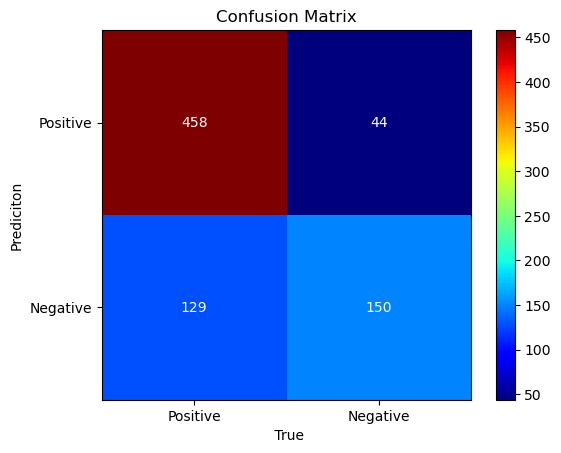

In [14]:
confusion_matrix = np.array([[458, 44], [129, 150]])

labels = ['Positive', 'Negative']
tick_labels = ['Positive', 'Negative']

plt.imshow(confusion_matrix, cmap='jet')

# 添加顏色條
plt.colorbar()

# 添加刻度標籤
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(labels)), labels)

# 添加數值標籤
for i in range(len(labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')

# 設置標題和軸標籤
plt.title('Confusion Matrix')
plt.xlabel(' True')
plt.ylabel('Prediciton')

# 顯示圖表
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# 顯示 預測結果分數
print("=========== Random Forest Classifier =============")

print("accuracy test: ",accuracy_score(y_test, y_prediction))
print("accuracy train: ",accuracy_score(y_train, y_prediction_train))


=========== Random Forest Classifier =============
accuracy test:  0.6956521739130435
accuracy train:  1.0


In [ ]:
predicted_ans = tree.predict(A)
test_ids = test_data['id']
my_submission = pd.DataFrame({'id':test_ids, 'Underclocking':predicted_ans})
my_submission.to_csv('submission.csv', index=False)